In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import pickle

In [2]:
df = pd.read_csv("C:\\Users\\91878\\Downloads\\DATASET_PHISHING_DOMAIN_DETECTION.csv", low_memory = False)
df.head()

,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,1,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [3]:
# Explore data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         19431 non-null  object 
 1   url_length                  19431 non-null  int64  
 2   hostname_length             19431 non-null  int64  
 3   ip                          19431 non-null  int64  
 4   total_of.                   19431 non-null  int64  
 5   total_of-                   19431 non-null  int64  
 6   total_of@                   19431 non-null  int64  
 7   total_of?                   19431 non-null  int64  
 8   total_of&                   19431 non-null  int64  
 9   total_of=                   19431 non-null  int64  
 10  total_of_                   19431 non-null  int64  
 11  total_of~                   19431 non-null  int64  
 12  total_of%                   19431 non-null  int64  
 13  total_of/                   194

In [4]:
# Check for missing values
df.isnull().sum()

url                0
url_length         0
hostname_length    0
ip                 0
total_of.          0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 86, dtype: int64

In [5]:
# Describe numerical features
df.describe()

,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,total_of_,...,right_clic,empty_title,domain_in_title,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,19431.000000,19431.000000,19431.000000,19431.000000,19431.000000,19431.000000,19431.000000,19431.000000,19431.000000,19431.000000,...,19431.000000,19431.000000,19431.000000,19431.000000,19431.000000,19431.000000,1.943100e+04,19431.000000,19431.000000,19431.000000
mean,61.134527,21.101127,0.649529,2.485564,0.997684,0.021872,0.141012,0.164994,0.296125,0.324481,...,0.001390,0.125006,0.774793,0.072873,492.192013,4063.306932,8.595096e+05,0.020328,0.533992,3.190263
std,56.205292,10.719241,0.477130,1.383635,2.076148,0.155149,0.364934,0.842362,1.018564,1.111470,...,0.037251,0.330735,0.417729,0.259935,803.880801,3107.806494,1.998160e+06,0.141125,0.498856,2.535792
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,84.000000,971.000000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,244.000000,4003.000000,1.885000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,449.000000,7026.000000,3.756425e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,19.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [6]:
df['status'] = df['status'].map({'legitimate': 0, 'phishing': 1})
df['domain_with_copyright'] = df['domain_with_copyright'].map({'one': 1, 'zero': 0, 'One': 1, 'Zero': 0, '0': 0, '1': 1})

In [7]:
df['status'].value_counts()

status
0    9716
1    9715
Name: count, dtype: int64

In [8]:
x = df.drop(['status', 'url'], axis = 1)
y = df["status"]

# Use SelectKBest to select top 5 best features
k = 10  # Select top 5 features
selector = SelectKBest(score_func=f_classif, k=k)
x_selected = selector.fit_transform(x, y)

mask = selector.get_support()        # Get the boolean mask of selected features
selected_features = x.columns[mask]       # Get the selected feature names
print("Selected features:", selected_features)      # Print the selected features

x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)      # splitting the data into training data and test data
print(x_train.shape, x_test.shape, x_selected.shape)
print(y_train.shape, y_test.shape, y.shape)

Selected features: Index(['url_length', 'total_of?', 'total_of_www', 'ratio_digits_url',
       'phish_hints', 'nb_hyperlinks', 'domain_in_title', 'domain_age',
       'google_index', 'page_rank'],
      dtype='object')
(15544, 10) (3887, 10) (19431, 10)
(15544,) (3887,) (19431,)


C:\Users\91878\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [56 58 60 65 68] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\91878\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [9]:
outliers = []
for feature in df[selected_features].select_dtypes(include=np.number).columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    # Capping and flooring outliers
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

In [10]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 1. Logistic Regression

In [11]:
model = LogisticRegression(random_state=42)
model.fit(x_train_scaled, y_train)

y_train_prediction = model.predict(x_train_scaled)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print("Accuracy on training data = ", training_data_accuracy)
print("Classification Report: \n", classification_report(y_train, y_train_prediction))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_train_prediction))

y_test_pred_logistic = model.predict(x_test_scaled)
testing_data_accuracy = accuracy_score(y_test, y_test_pred_logistic)
print("\n\nAccuracy on testing data = ", testing_data_accuracy)
print("Classification Report: \n", classification_report(y_test, y_test_pred_logistic))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred_logistic))

Accuracy on training data =  0.9289114770972723
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7801
           1       0.92      0.93      0.93      7743

    accuracy                           0.93     15544
   macro avg       0.93      0.93      0.93     15544
weighted avg       0.93      0.93      0.93     15544

Confusion Matrix: 
 [[7212  589]
 [ 516 7227]]


Accuracy on testing data =  0.9243632621559043
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1915
           1       0.93      0.93      0.93      1972

    accuracy                           0.92      3887
   macro avg       0.92      0.92      0.92      3887
weighted avg       0.92      0.92      0.92      3887

Confusion Matrix: 
 [[1768  147]
 [ 147 1825]]


## 2. Random Forest

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_train_prediction = rf.predict(x_train)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print("Accuracy on training data = ", training_data_accuracy)
print("Classification Report: \n", classification_report(y_train, y_train_prediction))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_train_prediction))

y_test_pred_rf = rf.predict(x_test)
testing_data_accuracy = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy on testing data = ", testing_data_accuracy)
print("Classification Report: \n", classification_report(y_test, y_test_pred_rf))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred_rf))

Accuracy on training data =  0.9998713329902214
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7801
           1       1.00      1.00      1.00      7743

    accuracy                           1.00     15544
   macro avg       1.00      1.00      1.00     15544
weighted avg       1.00      1.00      1.00     15544

Confusion Matrix: 
 [[7799    2]
 [   0 7743]]
Accuracy on testing data =  0.9868793413943916
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1915
           1       0.98      0.99      0.99      1972

    accuracy                           0.99      3887
   macro avg       0.99      0.99      0.99      3887
weighted avg       0.99      0.99      0.99      3887

Confusion Matrix: 
 [[1884   31]
 [  20 1952]]


## 3. Support Vector Machine

In [13]:
svc = SVC(random_state=42)
svc.fit(x_train_scaled, y_train)

y_train_prediction = svc.predict(x_train_scaled)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print("Accuracy on training data = ", training_data_accuracy)
print("Classification Report: \n", classification_report(y_train, y_train_prediction))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_train_prediction))

y_test_pred_svc = svc.predict(x_test_scaled)
testing_data_accuracy = accuracy_score(y_test, y_test_pred_svc)
print("Accuracy on testing data = ", testing_data_accuracy)
print("Classification Report: \n", classification_report(y_test, y_test_pred_svc))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred_svc))

Accuracy on training data =  0.9442228512609367
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      7801
           1       0.94      0.95      0.94      7743

    accuracy                           0.94     15544
   macro avg       0.94      0.94      0.94     15544
weighted avg       0.94      0.94      0.94     15544

Confusion Matrix: 
 [[7348  453]
 [ 414 7329]]
Accuracy on testing data =  0.939799331103679
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1915
           1       0.94      0.94      0.94      1972

    accuracy                           0.94      3887
   macro avg       0.94      0.94      0.94      3887
weighted avg       0.94      0.94      0.94      3887

Confusion Matrix: 
 [[1792  123]
 [ 111 1861]]


## 4. Decision Tree

In [14]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)

y_train_prediction = decision_tree.predict(x_train)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print("Accuracy on training data = ", training_data_accuracy)
print("Classification Report: \n", classification_report(y_train, y_train_prediction))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_train_prediction))

y_test_pred_dt = decision_tree.predict(x_test)
testing_data_accuracy = accuracy_score(y_test, y_test_pred_dt)
print("Accuracy on testing data = ", testing_data_accuracy)
print("Classification Report: \n", classification_report(y_test, y_test_pred_dt))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred_dt))

Accuracy on training data =  0.9998713329902214
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7801
           1       1.00      1.00      1.00      7743

    accuracy                           1.00     15544
   macro avg       1.00      1.00      1.00     15544
weighted avg       1.00      1.00      1.00     15544

Confusion Matrix: 
 [[7799    2]
 [   0 7743]]
Accuracy on testing data =  0.9776177000257268
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1915
           1       0.98      0.98      0.98      1972

    accuracy                           0.98      3887
   macro avg       0.98      0.98      0.98      3887
weighted avg       0.98      0.98      0.98      3887

Confusion Matrix: 
 [[1869   46]
 [  41 1931]]


## 5. K-Nearest Neighbors

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

y_train_prediction = knn.predict(x_train_scaled)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print("Accuracy on training data = ", training_data_accuracy)
print("Classification Report: \n", classification_report(y_train, y_train_prediction))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_train_prediction))

y_test_pred_knn = knn.predict(x_test_scaled)
testing_data_accuracy = accuracy_score(y_test, y_test_pred_knn)
print("Accuracy on testing data = ", testing_data_accuracy)
print("Classification Report: \n", classification_report(y_test, y_test_pred_knn))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred_knn))

Accuracy on training data =  0.9651955738548637
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      7801
           1       0.96      0.97      0.97      7743

    accuracy                           0.97     15544
   macro avg       0.97      0.97      0.97     15544
weighted avg       0.97      0.97      0.97     15544

Confusion Matrix: 
 [[7516  285]
 [ 256 7487]]
Accuracy on testing data =  0.9539490609724723
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1915
           1       0.95      0.96      0.95      1972

    accuracy                           0.95      3887
   macro avg       0.95      0.95      0.95      3887
weighted avg       0.95      0.95      0.95      3887

Confusion Matrix: 
 [[1818   97]
 [  82 1890]]


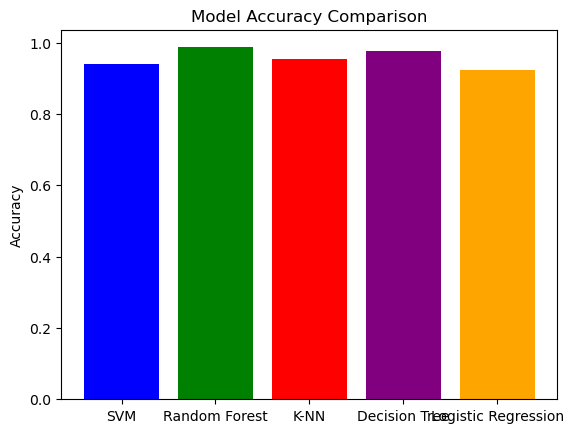

In [16]:
# Final comparison of the model accuracies
models = ['SVM', 'Random Forest', 'K-NN', 'Decision Tree', 'Logistic Regression']
accuracies = [
    accuracy_score(y_test, y_test_pred_svc),
    accuracy_score(y_test, y_test_pred_rf),
    accuracy_score(y_test, y_test_pred_knn),
    accuracy_score(y_test, y_test_pred_dt),
    accuracy_score(y_test, y_test_pred_logistic)
]

plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [17]:
with open('model.pickle', 'wb') as file:
     pickle.dump(rf, file)